<a href="https://colab.research.google.com/github/Marypalomino/Datathon-Cobertura-Educativa-/blob/main/Proyecto_Datathon_Cobertura_educativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

texto en cursiva# Proyecto Datathon - Educación sin barreras

# Pregunta de investigación
¿Existen brechas en la cobertura geográfica de los establecimientos educativos en Colombia por municipio, departamento y zona, y cómo se distribuyen estos establecimientos según si tienen matrícula contratada (paga) o no?

# Objetivo general
Analizar la cobertura geográfica de los establecimientos educativos en Colombia, por municipio, departamento y zona, y evaluar la distribución de establecimientos con matrícula contratada (paga) en relación con su ubicación.

# Objetivos específicos

* Identificar la distribución de los establecimientos educativos por municipio, departamento y zona (urbana/rural).

* Analizar la proporción de establecimientos educativos con matrícula contratada (paga) frente a los que no la tienen, por zona y departamento.

* Comparar la cobertura educativa por departamento entre las cuatro zonas (urbanas, rurales, urbanas-rurales, rurales-urbanas).

* Visualizar geográficamente la presencia y ausencia de matrícula contratada (paga) en los establecimientos educativos por departamento y municipio.

* Detectar posibles brechas territoriales en el acceso a educación gratuita mediante análisis espacial de los establecimientos sin matrícula contratada.

# Hipótesis
La cobertura geográfica de los establecimientos educativos en Colombia presenta desigualdades significativas entre zonas urbanas y rurales, y una mayor concentración de matrícula contratada (paga) en zonas urbanas y departamentos con mayor desarrollo económico.


# Proceso ETL (Extract, Transform and Load)

# 1. "E" (Extract)

In [ ]:
# Importar librerías para análisis
import pandas as pd
import numpy as np

# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)

In [ ]:
# Crear DataFrame
file_path = "/ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250605 (1).csv"
# Try reading with semicolon delimiter
df = pd.read_csv(file_path, encoding='utf-8', sep=';')

# Visualizamos las primeras filas para entender la estructura de los datos
df

,año,secretaria,codigodepartamento,nombredepartamento,codigomunicipio,nombremunicipio,codigoestablecimiento,nombreestablecimiento,zona,direccion,...,numero_de_Sedes,estado,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,calendario,internado,estrato_Socio_Economico,correo_Electronico
0,"2,016",BUCARAMANGA,68,SANTANDER,"68,001",BUCARAMANGA,"368,001,000,290",FUND COL NUEVA GENERACION JUVENIL ...,URBANA,CLL 8 NO 22-57,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
1,"2,016",BUCARAMANGA,68,SANTANDER,"68,001",BUCARAMANGA,"368,001,006,298",COL MUNDO CONSTRUCTIVO ...,URBANA,CLL 84 NO 24ª - 60,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
2,"2,016",BUCARAMANGA,68,SANTANDER,"68,001",BUCARAMANGA,"368,001,000,907",COL ATENAS ...,URBANA,CR 26 NO 33-73,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
3,"2,016",SANTANDER,68,SANTANDER,"68,077",BARBOSA,"368,077,000,264",COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CARRERA 10 # 9 - 12,...,1,NaN,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,A,NaN,NaN,...
4,"2,016",NORTE SANTANDER,54,NORTE DE SANTANDER,"54,874",VILLA DEL ROSARIO,"354,874,000,619",COL NUESTRA SEÑORA DEL ROSARIO,URBANA,CLL 6 8-48 B.GRAMALOTE,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,"2,016",MAGDALENA,47,MAGDALENA,"47,745",SITIONUEVO,"347,745,000,517",CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CL 7 11 50,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,NaN
22526,"2,016",CARTAGENA,13,BOLÍVAR,"13,001",CARTAGENA,"313,001,000,541",COL. LA ANUNCIACION,URBANA,CL 45 26 A 115,...,1,NaN,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,A,NaN,NaN,NaN
22527,"2,016",BUENAVENTURA,76,VALLE DEL CAUCA,"76,109",BUENAVENTURA,"376,109,008,303",CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,CL 3 A 88 62,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,SI,A,NINGUNO,ESTRATO 1,NaN
22528,"2,016",BOGOTA,11,"BOGOTÁ, D.C.","11,001","BOGOTÁ, D.C.","311,001,087,300",LIC APRENDO CON MIS AMIGOS ...,URBANA,CR. 94 NO.29-30,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,NaN


# 2. "T" (Transform)

In [ ]:
df_copy = df.copy ()

In [ ]:
# Contamos valores únicos para cada columna
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        22530 non-null  object 
 1   secretaria                 22530 non-null  object 
 2   codigodepartamento         22530 non-null  int64  
 3   nombredepartamento         22530 non-null  object 
 4   codigomunicipio            22530 non-null  object 
 5   nombremunicipio            22530 non-null  object 
 6   codigoestablecimiento      22530 non-null  object 
 7   nombreestablecimiento      22530 non-null  object 
 8   zona                       22528 non-null  object 
 9   direccion                  22530 non-null  object 
 10  telefono                   20298 non-null  object 
 11  nombre_Rector              22510 non-null  object 
 12  tipo_Establecimiento       22530 non-null  object 
 13  etnias                     914 non-null    obj

In [ ]:
df_copy = df.copy ()
# Vista gral. de los primeros registros
df_copy.head(8)

,año,secretaria,codigodepartamento,nombredepartamento,codigomunicipio,nombremunicipio,codigoestablecimiento,nombreestablecimiento,zona,direccion,...,numero_de_Sedes,estado,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,calendario,internado,estrato_Socio_Economico,correo_Electronico
0,"2,016",BUCARAMANGA,68,SANTANDER,"68,001",BUCARAMANGA,"368,001,000,290",FUND COL NUEVA GENERACION JUVENIL ...,URBANA,CLL 8 NO 22-57,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
1,"2,016",BUCARAMANGA,68,SANTANDER,"68,001",BUCARAMANGA,"368,001,006,298",COL MUNDO CONSTRUCTIVO ...,URBANA,CLL 84 NO 24ª - 60,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
2,"2,016",BUCARAMANGA,68,SANTANDER,"68,001",BUCARAMANGA,"368,001,000,907",COL ATENAS ...,URBANA,CR 26 NO 33-73,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
3,"2,016",SANTANDER,68,SANTANDER,"68,077",BARBOSA,"368,077,000,264",COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CARRERA 10 # 9 - 12,...,1,NaN,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,A,NaN,NaN,...
4,"2,016",NORTE SANTANDER,54,NORTE DE SANTANDER,"54,874",VILLA DEL ROSARIO,"354,874,000,619",COL NUESTRA SEÑORA DEL ROSARIO,URBANA,CLL 6 8-48 B.GRAMALOTE,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-
5,"2,016",NORTE SANTANDER,54,NORTE DE SANTANDER,"54,810",TIBÚ,"354,810,000,429",LIC MIXTO GUZMAN BERTTY,URBANA,CLL 7 8-26 BARRIO LIBERTADORES,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-
6,"2,016",NORTE SANTANDER,54,NORTE DE SANTANDER,"54,498",OCAÑA,"354,498,002,346",JARD INF PUCHERITOS,URBANA,CAR 28 3-55 B.1O. DE MAYO,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-
7,"2,016",NORTE SANTANDER,54,NORTE DE SANTANDER,"54,518",PAMPLONA,"354,518,001,309",JARD INF ESTRELLITAS CREATIVAS,URBANA,CR 7 4-68,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-


In [ ]:
# Contar cuántos registros están duplicados
df_copy.duplicated().sum()

np.int64(0)

In [ ]:
# Verificar valores duplicados
for v_col in df_copy.columns:
   print(f'Columna: {v_col} = {len(list(pd.unique (df_copy[v_col])))}')

Columna: año = 1
Columna: secretaria = 95
Columna: codigodepartamento = 33
Columna: nombredepartamento = 33
Columna: codigomunicipio = 1121
Columna: nombremunicipio = 1037
Columna: codigoestablecimiento = 22530
Columna: nombreestablecimiento = 20710
Columna: zona = 5
Columna: direccion = 21272
Columna: telefono = 19108
Columna: nombre_Rector = 21672
Columna: tipo_Establecimiento = 2
Columna: etnias = 155
Columna: sector = 1
Columna: genero = 1
Columna: niveles = 27
Columna: jornadas = 60
Columna: caracter = 1
Columna: especialidad = 102
Columna: grados = 1122
Columna: modelos_Educativos = 2404
Columna: capacidades_Excepcionales = 22
Columna: discapacidades = 497
Columna: idiomas = 14
Columna: numero_de_Sedes = 43
Columna: estado = 1
Columna: prestador_de_Servicio = 13
Columna: propiedad_Planta_Fisica = 14
Columna: resguardo = 274
Columna: matricula_Contratada = 2
Columna: calendario = 3
Columna: internado = 8
Columna: estrato_Socio_Economico = 17
Columna: correo_Electronico = 16098


In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
# Ver columnas con valores nulos
df_copy.isna().sum()

,0
año,0
secretaria,0
codigodepartamento,0
nombredepartamento,0
codigomunicipio,0
nombremunicipio,0
codigoestablecimiento,0
nombreestablecimiento,0
zona,2
direccion,0


In [ ]:
# Descripción general por columnas
df_copy.describe()
#df_intraf.describe(include='all')

,codigodepartamento,sector,genero,caracter,numero_de_Sedes,estado
count,22530.000000,0.0,0.0,0.0,22530.000000,0.0
mean,37.865735,NaN,NaN,NaN,2.683622,NaN
std,26.614388,NaN,NaN,NaN,3.765797,NaN
min,5.000000,NaN,NaN,NaN,0.000000,NaN
25%,11.000000,NaN,NaN,NaN,1.000000,NaN
50%,25.000000,NaN,NaN,NaN,1.000000,NaN
75%,66.000000,NaN,NaN,NaN,3.000000,NaN
max,99.000000,NaN,NaN,NaN,68.000000,NaN


In [ ]:
# Eliminar columnas innecesarias
df_copy.drop(columns=['año', 'secretaria', 'codigodepartamento', 'codigomunicipio', 'codigoestablecimiento', 'direccion', 'telefono', 'nombre_Rector', 'sector', 'genero', 'jornadas', 'caracter', 'estado', 'calendario', 'internado', 'correo_Electronico', 'numero_de_Sedes'], inplace=True)

df_copy

,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,tipo_Establecimiento,etnias,niveles,especialidad,grados,modelos_Educativos,capacidades_Excepcionales,discapacidades,idiomas,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,estrato_Socio_Economico
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,NaN,"MEDIA,BÁSICA SECUNDARIA",ACADÉMICA,"6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
1,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,CENTRO EDUCATIVO,NaN,PREESCOLAR,NaN,-3,EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
2,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,NaN,MEDIA,ACADÉMICA,"10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
3,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",NaN,"-2,-1,0,1,2,3,4,5,6,7",EDUCACIÓN TRADICIONAL,NaN,"DI-COGNITIVO,SÍNDROME DE DOWN",INGLÉS,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,NaN
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA PRIMARIA",NaN,"-2,-1,0,1,2,3,4,5",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
22526,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,NaN
22527,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NaN,NaN,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,SI,ESTRATO 1
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA PRIMARIA",NaN,"-2,-1,0,1,2,3,4,5","PREESCOLAR ESCOLARIZADO_,EDUCACIÓN TRADICIONAL",NaN,NaN,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN


In [ ]:
# Volver a verificar valores duplicados
df_copy.duplicated().sum()

np.int64(4)

In [ ]:
# Para observar cuál es el número de columna con el valor duplicado
df_copy.duplicated()[ df_copy.duplicated() == True ]

,0
18467,True
19180,True
22167,True
22402,True


In [ ]:
# Ver los datos de las filas duplicadas
df_copy.iloc[18466:18468]

,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,tipo_Establecimiento,etnias,niveles,especialidad,grados,modelos_Educativos,capacidades_Excepcionales,discapacidades,idiomas,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,estrato_Socio_Economico
18466,META,VILLAVICENCIO,LICEO PSICOPEDAGOGICO JOSÉ MARTI,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","NO APLICA,ACADÉMICA","-2,-1,0,1,2,3,4,5,6,7,8,9,10,23,24,25,26","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NaN,NaN,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,SI,NaN
18467,VALLE DEL CAUCA,BUENAVENTURA,LICEO MANANTIAL DE LA ALEGRIA,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA PRIMARIA",NaN,"-2,-1,0,1,2,3,4,5",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,ESTRATO 1


In [ ]:
# Eliminar valores duplicaddos
df_copy.drop_duplicates(inplace=True)

df_copy

,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,tipo_Establecimiento,etnias,niveles,especialidad,grados,modelos_Educativos,capacidades_Excepcionales,discapacidades,idiomas,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,estrato_Socio_Economico
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,NaN,"MEDIA,BÁSICA SECUNDARIA",ACADÉMICA,"6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
1,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,CENTRO EDUCATIVO,NaN,PREESCOLAR,NaN,-3,EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
2,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,NaN,MEDIA,ACADÉMICA,"10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
3,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",NaN,"-2,-1,0,1,2,3,4,5,6,7",EDUCACIÓN TRADICIONAL,NaN,"DI-COGNITIVO,SÍNDROME DE DOWN",INGLÉS,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,NaN
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA PRIMARIA",NaN,"-2,-1,0,1,2,3,4,5",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN
22526,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,NaN
22527,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NaN,NaN,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,SI,ESTRATO 1
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA PRIMARIA",NaN,"-2,-1,0,1,2,3,4,5","PREESCOLAR ESCOLARIZADO_,EDUCACIÓN TRADICIONAL",NaN,NaN,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,NaN


In [ ]:
# Verificar nuevamente los valores duplicados
df_copy.duplicated().sum()

np.int64(0)

In [ ]:
# Analizar el número de columnas y sus nombres
df_copy.columns

Index(['nombredepartamento', 'nombremunicipio', 'nombreestablecimiento',
       'zona', 'tipo_Establecimiento', 'etnias', 'niveles', 'especialidad',
       'grados', 'modelos_Educativos', 'capacidades_Excepcionales',
       'discapacidades', 'idiomas', 'prestador_de_Servicio',
       'propiedad_Planta_Fisica', 'resguardo', 'matricula_Contratada',
       'estrato_Socio_Economico'],
      dtype='object')

In [ ]:
# Ver la infomación general del tipo de valores
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22526 entries, 0 to 22529
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nombredepartamento         22526 non-null  object
 1   nombremunicipio            22526 non-null  object
 2   nombreestablecimiento      22526 non-null  object
 3   zona                       22524 non-null  object
 4   tipo_Establecimiento       22526 non-null  object
 5   etnias                     914 non-null    object
 6   niveles                    22309 non-null  object
 7   especialidad               11852 non-null  object
 8   grados                     22309 non-null  object
 9   modelos_Educativos         22250 non-null  object
 10  capacidades_Excepcionales  378 non-null    object
 11  discapacidades             3758 non-null   object
 12  idiomas                    3186 non-null   object
 13  prestador_de_Servicio      22526 non-null  object
 14  propiedad_P

In [ ]:
# Eliminar columnas innecesarias
df_copy.drop(columns=['grados', 'nombreestablecimiento', 'etnias', 'niveles', 'especialidad', 'modelos_Educativos', 'discapacidades', 'propiedad_Planta_Fisica', 'resguardo', 'estrato_Socio_Economico'], inplace=True)

df_copy

,nombredepartamento,nombremunicipio,zona,tipo_Establecimiento,capacidades_Excepcionales,idiomas,prestador_de_Servicio,matricula_Contratada
0,SANTANDER,BUCARAMANGA,URBANA,INSTITUCION EDUCATIVA,NaN,INGLÉS,PERSONA NATURAL,NO
1,SANTANDER,BUCARAMANGA,URBANA,CENTRO EDUCATIVO,NaN,INGLÉS,PERSONA NATURAL,NO
2,SANTANDER,BUCARAMANGA,URBANA,INSTITUCION EDUCATIVA,NaN,INGLÉS,PERSONA NATURAL,NO
3,SANTANDER,BARBOSA,URBANA,CENTRO EDUCATIVO,NaN,INGLÉS,COMUNIDAD RELIGIOSA,NO
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NaN,NaN,PERSONA NATURAL,NO
...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,URBANA,CENTRO EDUCATIVO,NaN,NaN,PERSONA NATURAL,NO
22526,BOLÍVAR,CARTAGENA,URBANA,INSTITUCION EDUCATIVA,NaN,NaN,COMUNIDAD RELIGIOSA,NO
22527,VALLE DEL CAUCA,BUENAVENTURA,URBANA,INSTITUCION EDUCATIVA,NaN,NaN,PERSONA NATURAL,SI
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",URBANA,CENTRO EDUCATIVO,NaN,INGLÉS,PERSONA NATURAL,NO


In [ ]:
display(df_copy.columns)

Index(['nombredepartamento', 'nombremunicipio', 'zona', 'tipo_Establecimiento',
       'capacidades_Excepcionales', 'idiomas', 'prestador_de_Servicio',
       'matricula_Contratada'],
      dtype='object')

In [ ]:
df_copy['zona'] = df_copy['zona'].str.strip().str.lower()

# se reemplazan los valores combinados por uno solo
df_copy['zona'] = df_copy['zona'].replace({
    'rural,urbana': 'rural',
    'urbana,rural': 'urbana'
})

print(df_copy['zona'].unique())

['urbana' 'rural' nan]


---
### 7. Guardar Datos Limpios

In [ ]:
df_copy.to_csv('/cleaned_ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250605 (1) (6).csv', index=False)
print("Datos limpios guardados como 'cleaned_ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250605 (1) (6).csv'")

Datos limpios guardados como 'cleaned_ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250605 (1) (6).csv'


In [ ]:
from google.colab import files

# Descargar el archivo generado
files.download('/cleaned_ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250605 (1) (6).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### 8. Crear DataFrame con el dataset después de la etapa de la limpieza

In [ ]:
df_cleaned = pd.read_csv('/cleaned_ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250605 (1) (6) (5).csv')
df_cleaned

,nombredepartamento,nombremunicipio,zona,tipo_Establecimiento,capacidades_Excepcionales,idiomas,prestador_de_Servicio,matricula_Contratada
0,SANTANDER,BUCARAMANGA,urbana,INSTITUCION EDUCATIVA,NaN,INGLÉS,PERSONA NATURAL,NO
1,SANTANDER,BUCARAMANGA,urbana,CENTRO EDUCATIVO,NaN,INGLÉS,PERSONA NATURAL,NO
2,SANTANDER,BUCARAMANGA,urbana,INSTITUCION EDUCATIVA,NaN,INGLÉS,PERSONA NATURAL,NO
3,SANTANDER,BARBOSA,urbana,CENTRO EDUCATIVO,NaN,INGLÉS,COMUNIDAD RELIGIOSA,NO
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,urbana,INSTITUCION EDUCATIVA,NaN,NaN,PERSONA NATURAL,NO
...,...,...,...,...,...,...,...,...
22521,MAGDALENA,SITIONUEVO,urbana,CENTRO EDUCATIVO,NaN,NaN,PERSONA NATURAL,NO
22522,BOLÍVAR,CARTAGENA,urbana,INSTITUCION EDUCATIVA,NaN,NaN,COMUNIDAD RELIGIOSA,NO
22523,VALLE DEL CAUCA,BUENAVENTURA,urbana,INSTITUCION EDUCATIVA,NaN,NaN,PERSONA NATURAL,SI
22524,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",urbana,CENTRO EDUCATIVO,NaN,INGLÉS,PERSONA NATURAL,NO


# 2.1 **Método EDA** (Exploratoty Data Analysis)

### **Estadística descriptiva**

In [ ]:
# Estadísticas de variables no numéricas. Observar el comportamiento descriptivo de las variables cualitativas.
df_cleaned.describe(exclude=['float64', 'int64', 'int32'], include='object')

,nombredepartamento,nombremunicipio,zona,tipo_Establecimiento,capacidades_Excepcionales,idiomas,prestador_de_Servicio,matricula_Contratada
count,22526,22526,22524,22526,378,3186,22526,22526
unique,33,1037,2,2,21,13,13,2
top,VALLE DEL CAUCA,"BOGOTÁ, D.C.",urbana,INSTITUCION EDUCATIVA,NO APLICA,INGLÉS,PERSONA NATURAL,no
freq,2483,2403,15157,11747,238,2896,10603,20392


1. Análisis del primer objetivo: * Identificar la distribución de los establecimientos educativos por departamento.

In [ ]:
# Número de departamentos únicos
departamentos = df_cleaned['nombredepartamento'].nunique()

# Número de municipios únicos
municipios = df_cleaned['nombremunicipio'].nunique()

# Número de zonas (rural/urbano/etc.)
zonas = df_cleaned['zona'].nunique()

print(f"Departamentos: {departamentos}")
print(f"Municipios: {municipios}")
print(f"Zonas: {zonas}")

Departamentos: 33
Municipios: 1037
Zonas: 2


In [ ]:
lista_departamentos = df_cleaned['nombredepartamento'].unique()
print(f"Departamentos: {departamentos}")
print("Lista de departamentos:")
print(sorted(lista_departamentos))

Departamentos: 33
Lista de departamentos:
['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'ATLÁNTICO', 'BOGOTÁ, D.C.', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CUNDINAMARCA', 'CÓRDOBA', 'GUAINÍA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA']


In [ ]:
# Conteo de establecimientos por departamento, municipio y zona
cobertura_geo = df_cleaned.groupby(['nombredepartamento', 'nombremunicipio', 'zona']).size().reset_index(name='conteo_establecimientos')

# Mostrar los primeros resultados
print(cobertura_geo.head())

  nombredepartamento nombremunicipio    zona  conteo_establecimientos
0           AMAZONAS      EL ENCANTO   rural                        1
1           AMAZONAS     LA CHORRERA   rural                        1
2           AMAZONAS      LA PEDRERA   rural                       18
3           AMAZONAS         LETICIA   rural                        4
4           AMAZONAS         LETICIA  urbana                       10


In [ ]:
print(cobertura_geo.to_string(index=False))

                                      nombredepartamento             nombremunicipio   zona  conteo_establecimientos
                                                AMAZONAS                  EL ENCANTO  rural                        1
                                                AMAZONAS                 LA CHORRERA  rural                        1
                                                AMAZONAS                  LA PEDRERA  rural                       18
                                                AMAZONAS                     LETICIA  rural                        4
                                                AMAZONAS                     LETICIA urbana                       10
                                                AMAZONAS             MIRITI - PARANÁ  rural                        7
                                                AMAZONAS              PUERTO ALEGRÍA  rural                        1
                                                AMAZONAS        

In [ ]:
# Agrupar por zona y contar cuántos municipios y departamentos únicos hay
agrupado_zona = df_cleaned.groupby('zona').agg({
    'nombredepartamento': pd.Series.nunique,
    'nombremunicipio': pd.Series.nunique
}).reset_index()

agrupado_zona.columns = ['zona', 'departamentos_unicos', 'municipios_unicos']

print(agrupado_zona)

     zona  departamentos_unicos  municipios_unicos
0   rural                    33                985
1  urbana                    33                875


In [ ]:
# Agrupar y obtener los nombres únicos en listas
zona_listas = df_cleaned.groupby('zona').agg({
    'nombredepartamento': lambda x: sorted(x.unique().tolist()),
    'nombremunicipio': lambda x: sorted(x.unique().tolist())
}).reset_index()

print(zona_listas)

     zona                                 nombredepartamento  \
0   rural  [AMAZONAS, ANTIOQUIA, ARAUCA, ARCHIPIÉLAGO DE ...   
1  urbana  [AMAZONAS, ANTIOQUIA, ARAUCA, ARCHIPIÉLAGO DE ...   

                                     nombremunicipio  
0  [ABEJORRAL, ABREGO, ABRIAQUÍ, ACACÍAS, ACANDÍ,...  
1  [ABEJORRAL, ABREGO, ABRIAQUÍ, ACACÍAS, ACEVEDO...  


In [ ]:
# Eliminar duplicados para ver combinación única de zona, departamento y municipio
zona_dep_mun = df_cleaned[['zona', 'nombredepartamento', 'nombremunicipio']].drop_duplicates()

# Ordenar para mejor lectura
zona_dep_mun = zona_dep_mun.sort_values(['zona', 'nombredepartamento', 'nombremunicipio'])

print(zona_dep_mun.to_string(index=False))

  zona                                       nombredepartamento             nombremunicipio
 rural                                                 AMAZONAS                  EL ENCANTO
 rural                                                 AMAZONAS                 LA CHORRERA
 rural                                                 AMAZONAS                  LA PEDRERA
 rural                                                 AMAZONAS                     LETICIA
 rural                                                 AMAZONAS             MIRITI - PARANÁ
 rural                                                 AMAZONAS              PUERTO ALEGRÍA
 rural                                                 AMAZONAS                PUERTO ARICA
 rural                                                 AMAZONAS               PUERTO NARIÑO
 rural                                                 AMAZONAS            PUERTO SANTANDER
 rural                                                 AMAZONAS                 

In [ ]:
# Total de establecimientos por departamento
establecimientos_totales = df_cleaned.groupby('nombredepartamento').size().reset_index(name='total_establecimientos')

In [ ]:
# Ordenar de mayor a menor
establecimientos_totales = establecimientos_totales.sort_values(by='total_establecimientos', ascending=False)

# Reiniciar el índice para que quede ordenado también
establecimientos_totales.reset_index(drop=True, inplace=True)

# Mostrar la tabla
print(establecimientos_totales)

                                   nombredepartamento  total_establecimientos
0                                     VALLE DEL CAUCA                    2483
1                                        BOGOTÁ, D.C.                    2403
2                                              NARIÑO                    2400
3                                           ANTIOQUIA                    2188
4                                        CUNDINAMARCA                    1377
5                                           ATLÁNTICO                    1215
6                                           SANTANDER                    1126
7                                               CAUCA                     814
8                                             BOLÍVAR                     773
9                                             CÓRDOBA                     742
10                                          MAGDALENA                     702
11                                             BOYACÁ           

Objetivo 2. Analizar la proporción de establecimientos educativos con matrícula contratada (paga) frente a los que no la tienen, por zona y departamento.

In [ ]:
# Asegurar consistencia
df_cleaned['matricula_Contratada'] = df_cleaned['matricula_Contratada'].str.upper().fillna('NO')

# Filtrar los que sí tienen matrícula contratada
establecimientos_contratada = df_cleaned[df_cleaned['matricula_Contratada'] == 'SI']

# Contar cuántos hay por departamento
contratada_por_dep = establecimientos_contratada.groupby('nombredepartamento').size().reset_index(name='con_matricula_contratada')

In [ ]:
# Unir totales y contratadas
cobertura_matricula = pd.merge(establecimientos_totales, contratada_por_dep, on='nombredepartamento', how='left')

# Llenar con 0 donde no hay matrícula contratada
cobertura_matricula['con_matricula_contratada'] = cobertura_matricula['con_matricula_contratada'].fillna(0).astype(int)

# Calcular porcentaje
cobertura_matricula['porcentaje_contratada'] = (
    cobertura_matricula['con_matricula_contratada'] / cobertura_matricula['total_establecimientos'] * 100
).round(2)

print(cobertura_matricula.sort_values(by='porcentaje_contratada', ascending=False))

                                   nombredepartamento  total_establecimientos  \
28                                           AMAZONAS                      56   
32                                             VAUPÉS                      17   
31                                            GUAINÍA                      22   
7                                               CAUCA                     814   
22                                              CHOCÓ                     226   
12                                 NORTE DE SANTANDER                     657   
20                                         LA GUAJIRA                     302   
29                                            VICHADA                      50   
14                                              CESAR                     508   
27                                           GUAVIARE                      57   
9                                             CÓRDOBA                     742   
30  ARCHIPIÉLAGO DE SAN ANDR

In [ ]:
cobertura_matricula.sort_values(by='porcentaje_contratada', ascending=False)

,nombredepartamento,total_establecimientos,con_matricula_contratada,porcentaje_contratada
28,AMAZONAS,56,32,57.14
32,VAUPÉS,17,8,47.06
31,GUAINÍA,22,9,40.91
7,CAUCA,814,291,35.75
22,CHOCÓ,226,64,28.32
12,NORTE DE SANTANDER,657,171,26.03
20,LA GUAJIRA,302,71,23.51
29,VICHADA,50,11,22.00
14,CESAR,508,99,19.49
27,GUAVIARE,57,10,17.54


In [ ]:
# Normalizar los datos de matrícula contratada
df_cleaned['matricula_Contratada'] = df_cleaned['matricula_Contratada'].str.strip().str.lower()

In [ ]:
# Agrupar por departamento y zona
matricula_por_zona = df_cleaned.groupby(['nombredepartamento', 'zona', 'matricula_Contratada']).size().reset_index(name='conteo')

In [ ]:
# Pivotear la tabla para tener columnas separadas para 'sí' y 'no'
matricula_pivot = matricula_por_zona.pivot_table(index=['nombredepartamento', 'zona'],
                                                 columns='matricula_Contratada',
                                                 values='conteo',
                                                 fill_value=0).reset_index()

In [ ]:
# Renombrar columnas para facilitar lectura
matricula_pivot.columns.name = None
matricula_pivot = matricula_pivot.rename(columns={'sí': 'con_matricula_contratada', 'no': 'sin_matricula_contratada'})

In [ ]:
# Calcular totales y porcentajes
matricula_pivot['total'] = (
    matricula_pivot['si'] + matricula_pivot['sin_matricula_contratada']
)

matricula_pivot['porcentaje_contratada'] = (
    (matricula_pivot['si'] / matricula_pivot['total']) * 100
).round(2)

display(matricula_pivot.sort_values(by='porcentaje_contratada', ascending=False))

,nombredepartamento,zona,sin_matricula_contratada,si,total,porcentaje_contratada
0,AMAZONAS,rural,13.0,32.0,45.0,71.11
46,NORTE DE SANTANDER,rural,68.0,95.0,163.0,58.28
38,LA GUAJIRA,rural,56.0,62.0,118.0,52.54
22,CAUCA,rural,241.0,258.0,499.0,51.70
62,VAUPÉS,rural,6.0,6.0,12.0,50.00
...,...,...,...,...,...,...
52,RISARALDA,rural,113.0,0.0,113.0,0.00
57,SUCRE,urbana,231.0,0.0,231.0,0.00
56,SUCRE,rural,249.0,0.0,249.0,0.00
58,TOLIMA,rural,160.0,0.0,160.0,0.00


In [ ]:
# Ordenar de mayor a menor porcentaje de matrícula contratada
matricula_pivot = matricula_pivot.sort_values(by='porcentaje_contratada', ascending=False).reset_index(drop=True)

# Mostrar resultados
print(matricula_pivot)

    nombredepartamento    zona  sin_matricula_contratada     si  total  \
0             AMAZONAS   rural                      13.0   32.0   45.0   
1   NORTE DE SANTANDER   rural                      68.0   95.0  163.0   
2           LA GUAJIRA   rural                      56.0   62.0  118.0   
3                CAUCA   rural                     241.0  258.0  499.0   
4               VAUPÉS   rural                       6.0    6.0   12.0   
..                 ...     ...                       ...    ...    ...   
61           RISARALDA   rural                     113.0    0.0  113.0   
62               SUCRE  urbana                     231.0    0.0  231.0   
63               SUCRE   rural                     249.0    0.0  249.0   
64              TOLIMA   rural                     160.0    0.0  160.0   
65             VICHADA  urbana                      12.0    0.0   12.0   

    porcentaje_contratada  
0                   71.11  
1                   58.28  
2                   52.54  

3. Análisis del objetivo: Comparar la cobertura educativa por departamento entre las cuatro zonas (urbanas, rurales, urbanas-rurales, rurales-urbanas).

In [ ]:
# Limpiar columnas por si hay inconsistencias
df_cleaned['zona'] = df_cleaned['zona'].str.strip().str.lower()
df_cleaned['nombredepartamento'] = df_cleaned['nombredepartamento'].str.strip().str.upper()


In [ ]:
# Agrupar por departamento y zona (conteo de establecimientos)
conteo = df_cleaned.groupby(['nombredepartamento', 'zona']).size().reset_index(name='conteo_establecimientos')

In [ ]:
# Calcular el total de establecimientos por departamento
totales_por_departamento = conteo.groupby('nombredepartamento')['conteo_establecimientos'].transform('sum')

In [ ]:
# Calcular porcentaje por zona
conteo['porcentaje'] = ((conteo['conteo_establecimientos'] / totales_por_departamento) * 100).round(2)


In [ ]:
# Pivotear la tabla para una vista más clara (zonas como columnas, porcentajes como valores)
tabla_porcentajes = conteo.pivot(index='nombredepartamento', columns='zona', values='porcentaje').fillna(0)

In [ ]:
# Ordenar por nombre de departamento
tabla_porcentajes = tabla_porcentajes.sort_index()

# Ver resultado
print(tabla_porcentajes)

zona                                                rural  urbana
nombredepartamento                                               
AMAZONAS                                            80.36   19.64
ANTIOQUIA                                           33.59   66.41
ARAUCA                                              47.57   52.43
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...  31.82   68.18
ATLÁNTICO                                            3.87   96.13
BOGOTÁ, D.C.                                         1.41   98.59
BOLÍVAR                                             24.84   75.16
BOYACÁ                                              32.88   67.12
CALDAS                                              33.33   66.67
CAQUETÁ                                             58.12   41.88
CASANARE                                            35.54   64.46
CAUCA                                               61.30   38.70
CESAR                                               29.33   70.67
CHOCÓ     

In [ ]:
from IPython.display import display
display(tabla_porcentajes)

zona,rural,urbana
nombredepartamento,,
AMAZONAS,80.36,19.64
ANTIOQUIA,33.59,66.41
ARAUCA,47.57,52.43
"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA",31.82,68.18
ATLÁNTICO,3.87,96.13
"BOGOTÁ, D.C.",1.41,98.59
BOLÍVAR,24.84,75.16
BOYACÁ,32.88,67.12
CALDAS,33.33,66.67


### **Visualizaciones**


Visualizaciones de objetivo 1: Identificar la distribución de los establecimientos educativos por departamento.


<ipython-input-164-9eec04bbb8fa>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


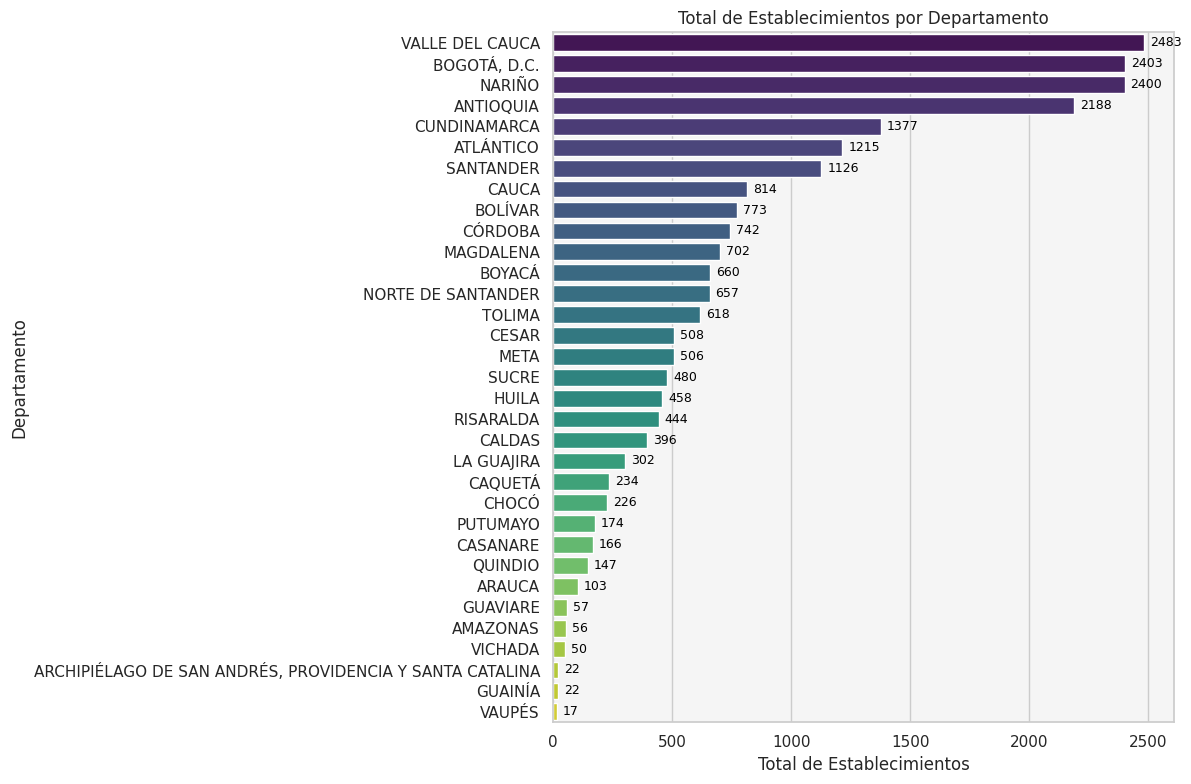

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear o reutilizar el DataFrame agrupado
establecimientos_totales = df_cleaned.groupby('nombredepartamento').size().reset_index(name='total_establecimientos')
establecimientos_totales = establecimientos_totales.sort_values(by='total_establecimientos', ascending=False).reset_index(drop=True)

# Configurar estilo con fondo gris claro
sns.set_style("whitegrid")
plt.rcParams['axes.facecolor'] = '#f5f5f5'  # fondo gris claro
plt.figure(figsize=(12, 8))

# Gráfico de barras horizontales
barplot = sns.barplot(
    data=establecimientos_totales,
    x='total_establecimientos',
    y='nombredepartamento',
    palette='viridis'
)

# Agregar etiquetas numéricas al final de cada barra
for i, (value, name) in enumerate(zip(establecimientos_totales['total_establecimientos'], establecimientos_totales['nombredepartamento'])):
    plt.text(
        value + max(establecimientos_totales['total_establecimientos']) * 0.01,  # un poco a la derecha de la barra
        i,  # posición en el eje y
        str(value),
        va='center',
        fontsize=9,
        color='black'
    )

# Etiquetas y título
plt.xlabel('Total de Establecimientos')
plt.ylabel('Departamento')
plt.title('Total de Establecimientos por Departamento')
plt.tight_layout()

# Mostrar gráfico
plt.show()

Visualizaciones del objetivo 2: Analizar la proporción de establecimientos educativos con matrícula contratada (paga) frente a los que no la tienen, por zona y departamento.

<Figure size 1400x1200 with 0 Axes>

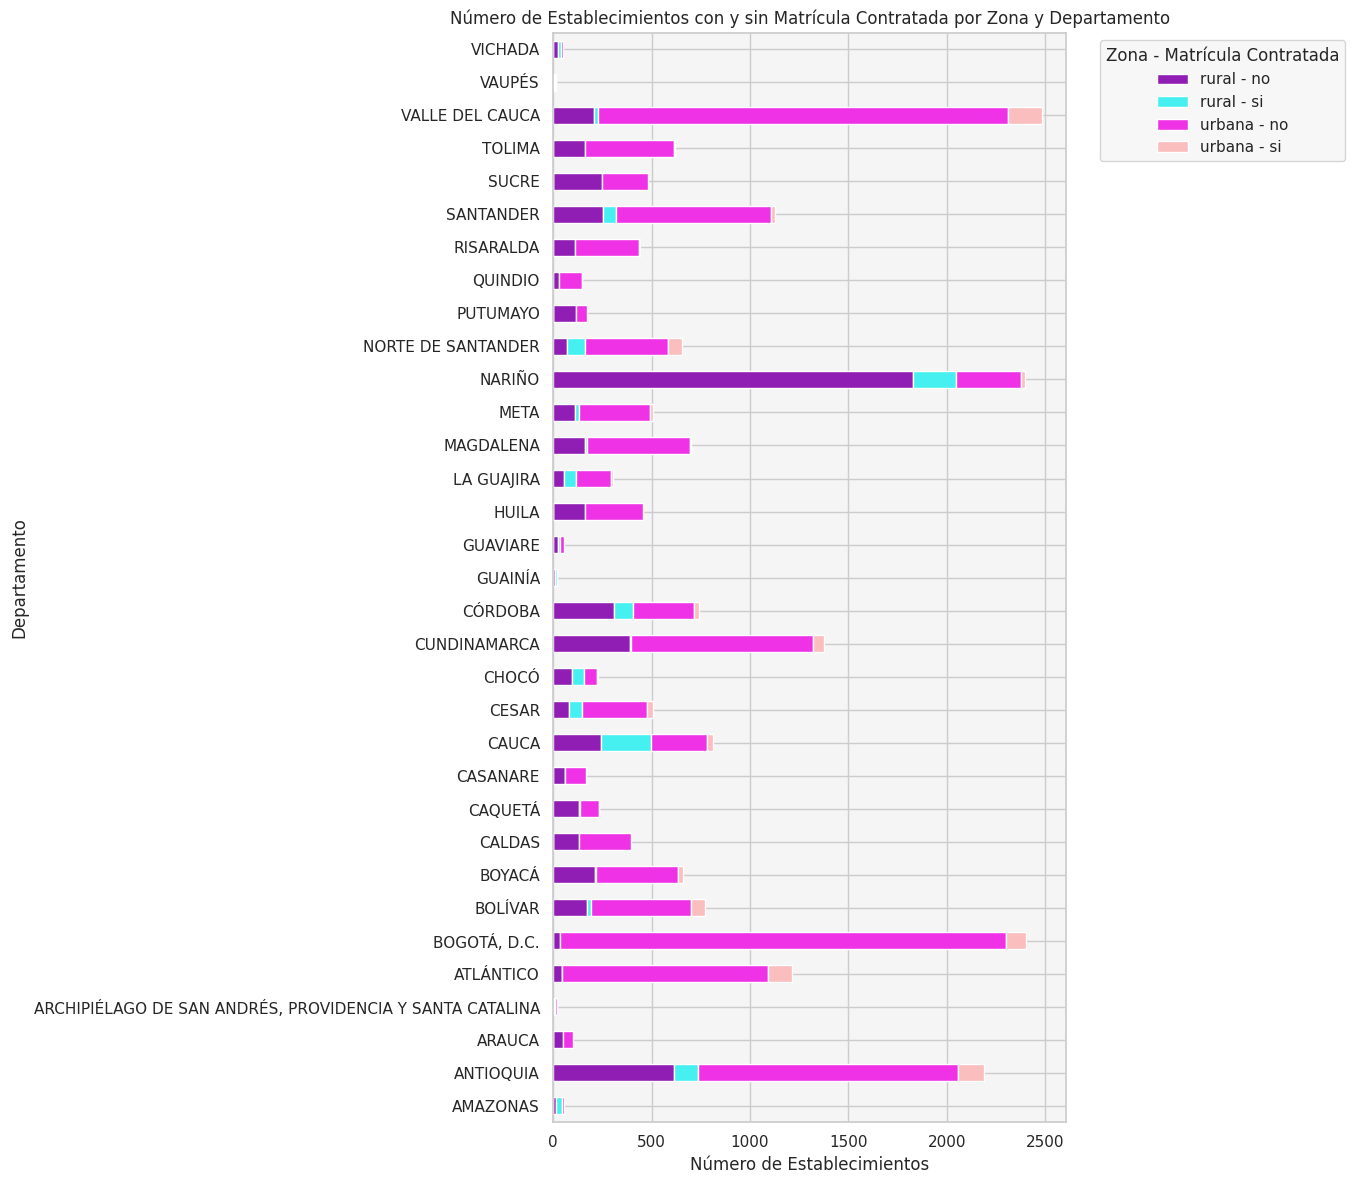

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Normaliza los textos
df_cleaned['zona'] = df_cleaned['zona'].str.strip()
df_cleaned['matricula_Contratada'] = df_cleaned['matricula_Contratada'].str.strip().str.lower()

# Agrupa por departamento, zona y matrícula contratada
conteo = df_cleaned.groupby(['nombredepartamento', 'zona', 'matricula_Contratada']).size().reset_index(name='conteo')

# Crea columna para usar como clave de color
conteo['grupo'] = conteo['zona'] + ' - ' + conteo['matricula_Contratada']

# Tabla pivote para gráfico apilado
pivot = conteo.pivot_table(index='nombredepartamento', columns='grupo', values='conteo', fill_value=0)

# Ordenar departamentos por total de matrícula contratada
columnas_contratada = [col for col in pivot.columns if col.endswith('sí')]
pivot['total_contratada'] = pivot[columnas_contratada].sum(axis=1)
pivot = pivot.sort_values(by='total_contratada', ascending=False).drop(columns='total_contratada')

# Colores vibrantes conocidos
colores_personalizados = {
    'Urbana - sí': '#e6194B',     # rojo fuerte
    'Urbana - no': '#f58231',     # naranja vibrante
    'Rural - sí': '#3cb44b',      # verde fuerte
    'Rural - no': '#aaffc3',      # verde claro vibrante
}

# Detectar claves faltantes
faltantes = [col for col in pivot.columns if col not in colores_personalizados]

# Colores vibrantes para asignar a claves faltantes
colores_vibrantes = [
    '#911eb4',  # púrpura
    '#46f0f0',  # cian claro
    '#f032e6',  # rosa brillante
    '#fabebe',  # rosa claro
    '#008080',  # teal
    '#e6beff',  # lavanda claro
    '#9A6324',  # marrón (repetido, pero puede usar otro)
    '#ffd8b1',  # melocotón claro
]

# Asignar colores a faltantes en orden, repitiendo si es necesario
for i, col in enumerate(faltantes):
    colores_personalizados[col] = colores_vibrantes[i % len(colores_vibrantes)]

# Gráfico
plt.figure(figsize=(14, 12))
pivot.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 12),
    color=[colores_personalizados.get(c, '#000000') for c in pivot.columns]  # negro si algo falla
)

plt.title('Número de Establecimientos con y sin Matrícula Contratada por Zona y Departamento')
plt.xlabel('Número de Establecimientos')
plt.ylabel('Departamento')
plt.legend(title='Zona - Matrícula Contratada', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()